In [1]:
from datavask_funksjoner import XYZ, get_filepath, set_filepath, load_svg_file, get_pose_from_gyro, get_absacceleration_from_pose, XYZ as xyz, get_abs_position_from_abs_acceleration, get_abs_g_from_pose, account_for_g
from pandas import DataFrame

In [2]:
dataFrame = get_abs_position_from_abs_acceleration(
    account_for_g(
        get_abs_g_from_pose(
            get_absacceleration_from_pose(
                    get_pose_from_gyro(
                        get_pose_from_gyro(
                        load_svg_file(get_filepath(),";")
                    ))))),
    accelerationColumnNameBase="accAccel"
)

In [35]:
from scipy.spatial.transform import Rotation as R
from numpy import newaxis, einsum

r = R.from_euler(
    "xyz",
    [*(dataFrame[[f"pose{x}"for x in xyz()]].to_numpy())],
    degrees=False).as_matrix()

rinv = R.from_euler(
    "xyz",
    [*(dataFrame[[f"pose{x}"for x in xyz()]].to_numpy())],
    degrees=False).inv().as_matrix()
g = dataFrame[["gX", "gY", "gZ"]].to_numpy()


Gen = dataFrame[["gX", "gY", "gZ", "t"]].copy()
Gr = dataFrame[["t"]].copy()
Ginv = dataFrame[["t"]].copy()
# Gr[["gX", "gY", "gZ"]] = einsum("ikj, ik -> ik", r, g)
Gr[["gX", "gY", "gZ"]] = [gi@ri for gi,ri in zip(g,r)]
# Ginv[["gX", "gY", "gZ"]] = einsum("ikj, ik -> ik", rinv, g)
Ginv[["gX", "gY", "gZ"]] = [gi@ri for gi,ri in zip(g,rinv)]

import matplotlib.pyplot as plt

%matplotlib tk
fig, ax = plt.subplots(1,3)

# fig.suptitle("strike 3")


Gen.plot(x="t", grid=True, title="Accelerometer plain",ax=ax[0], xlabel="seconds [s]", ylabel="g [9.81 m/s^2]")
Gr.plot(x="t", grid=True, title="Accelerometer r",ax=ax[1], xlabel="seconds [s]", ylabel="g [9.81 m/s^2]")
Ginv.plot(x="t", grid=True, title="Accelerometer r inv",ax=ax[2], xlabel="seconds [s]", ylabel="g [9.81 m/s^2]")
plt.show()

C:\Users\larsb\AppData\Local\Temp\ipykernel_2056\2981281969.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [23]:
from numpy import tile, newaxis
a = dataFrame[[f"accel{x}" for x in xyz()]].to_numpy()
g = tile(a[0,:], a.shape[0]).reshape([*a.shape])
an = a - g

In [71]:
pose = dataFrame[["poseX","poseY","poseZ","t"]].copy()

In [ ]:
dataFrame.to_csv(set_filepath())

<Axes: title={'center': 'Accelerometer'}, xlabel='seconds [s]', ylabel='g [9.81 m/s^2]'>

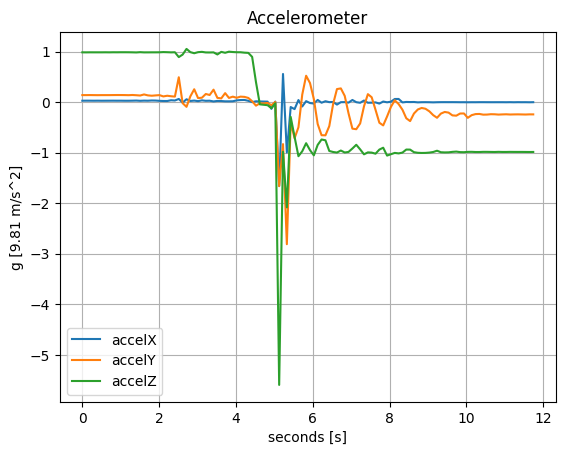

In [3]:
acceleration:DataFrame = dataFrame[["t", "accelX", "accelY", "accelZ"]].copy()
acceleration.plot(x="t", grid=True, title="Accelerometer", xlabel="seconds [s]", ylabel="g [9.81 m/s^2]")

<Axes: title={'center': 'Accelerometer'}, xlabel='seconds [s]', ylabel='g [9.81 m/s^2]'>

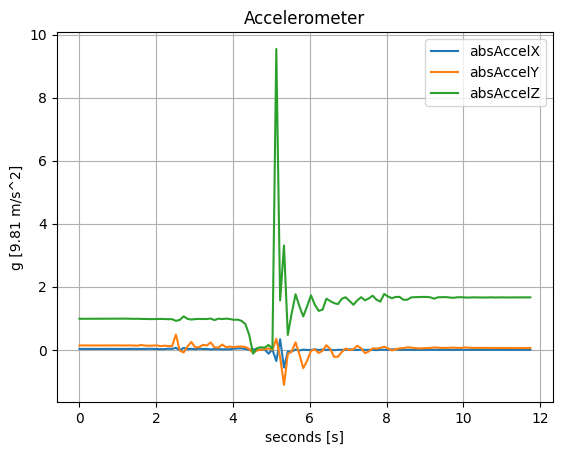

In [4]:
absAcceleration:DataFrame = dataFrame[["t", "absAccelX", "absAccelY", "absAccelZ"]].copy()
absAcceleration.plot(x="t", grid=True, title="Accelerometer", xlabel="seconds [s]", ylabel="g [9.81 m/s^2]")

<Axes: title={'center': 'Accelerometer'}, xlabel='seconds [s]', ylabel='g [9.81 m/s^2]'>

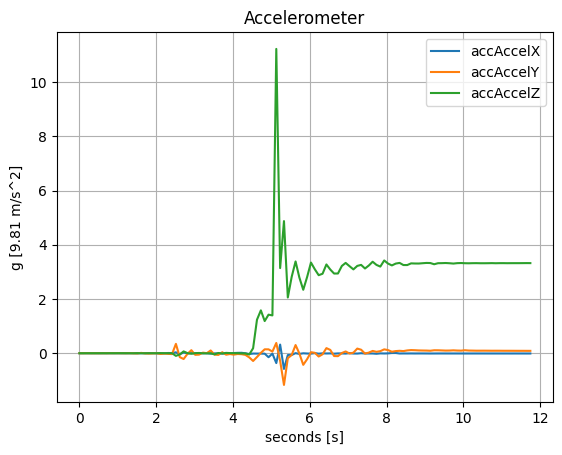

In [5]:
accountedaccel:DataFrame = dataFrame[["t", "accAccelX", "accAccelY", "accAccelZ"]].copy()
accountedaccel.plot(x="t", grid=True, title="Accelerometer", xlabel="seconds [s]", ylabel="g [9.81 m/s^2]")

<Axes: title={'center': 'Accelerometer'}, xlabel='seconds [s]', ylabel='g [9.81 m/s^2]'>

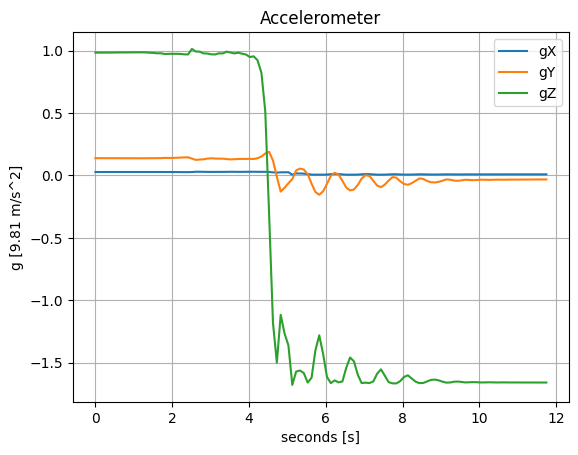

In [6]:
vectg:DataFrame = dataFrame[["t", "gX", "gY", "gZ"]].copy()
vectg.plot(x="t", grid=True, title="Accelerometer", xlabel="seconds [s]", ylabel="g [9.81 m/s^2]")

<Axes: title={'center': 'Accelerometer'}, xlabel='seconds [s]', ylabel='g [9.81 m/s^2]'>

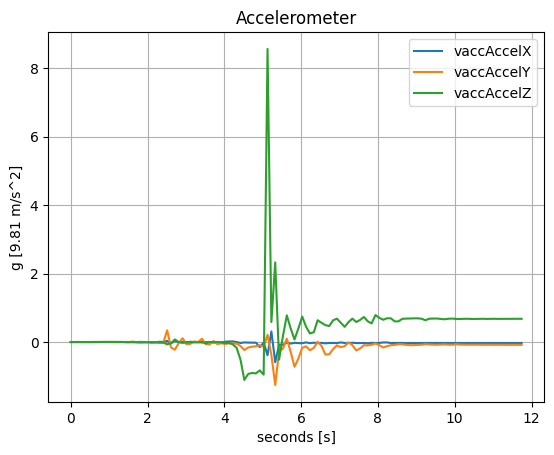

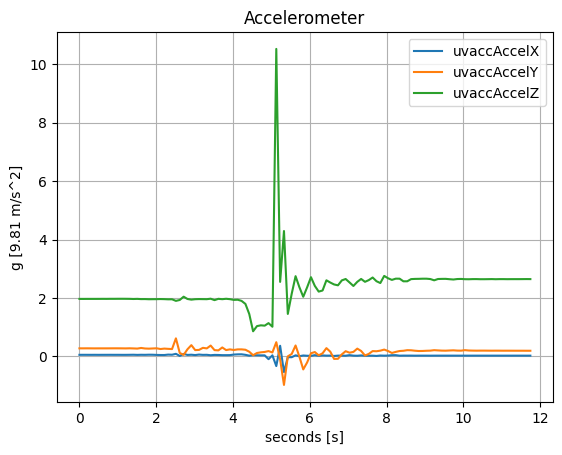

In [7]:

vacc=dataFrame[["vaccAccelX","vaccAccelY","vaccAccelZ","t"]]
uvacc =dataFrame[["uvaccAccelX","uvaccAccelY","uvaccAccelZ","t"]]
vacc.plot(x="t", grid=True, title="Accelerometer", xlabel="seconds [s]", ylabel="g [9.81 m/s^2]")
uvacc.plot(x="t", grid=True, title="Accelerometer", xlabel="seconds [s]", ylabel="g [9.81 m/s^2]")

<Axes: title={'center': 'position'}, xlabel='seconds [s]', ylabel='distance [m]'>

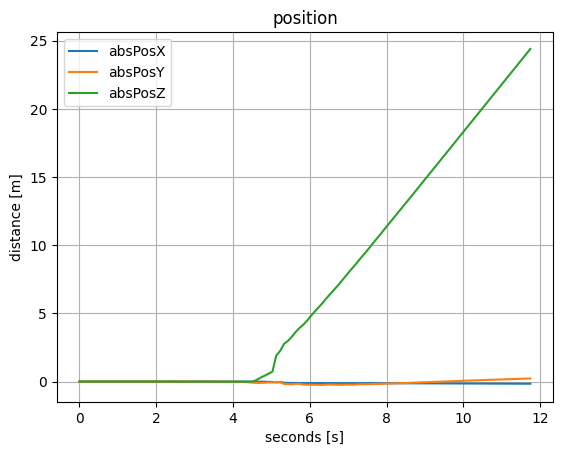

In [8]:
pos = dataFrame[["absPosX","absPosY","absPosZ","t"]]
pos.plot(x="t", grid=True, title="position", xlabel="seconds [s]", ylabel="distance [m]")

In [ ]:
gyroscope:DataFrame = dataFrame[["t", "gyroX", "gyroY", "gyroZ"]].copy()

In [ ]:
fusion:DataFrame = dataFrame[["t", "fusionPoseX", "fusionPoseY", "fusionPoseZ"]].copy()

In [ ]:
compass:DataFrame = dataFrame[["dt", "compassX", "compassY", "compassZ"]].copy()

In [ ]:
fusion:DataFrame = dataFrame[["dt", "fusionPoseX", "fusionPoseY", "fusionPoseZ"]].copy()

In [ ]:
import matplotlib.pyplot as plt

#to open in sepparate window using tkinter.
%matplotlib tk

fig, ax = plt.subplots(2,2)

fig.suptitle("strike 3")

acceleration.plot(x="t", grid=True, ax=ax[0,0], title="Accelerometer", xlabel="seconds [s]", ylabel="g [9.81 m/s^2]")
gyroscope.plot(x="t", grid=True, ax=ax[0,1], title="Gyroscope", xlabel="seconds [s]", ylabel="radians per second [rad/s]")
compass.plot(x="t", grid=True, ax=ax[1,0], title="Magnetometer", xlabel="seconds [s]", ylabel="magnetic force [μT]")
fusion.plot(x="t", grid=True, ax=ax[1,1], title="FusionPose", xlabel="seconds [s]", ylabel="unknown")
pose.plot(x="t", grid=True, title="Pose", xlabel="seconds [s]", ylabel="pose [radians]")

plt.show()
del(plt)

C:\Users\larsb\AppData\Local\Temp\ipykernel_18464\1581686178.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos["t"] = svg["t"]


<Axes: title={'center': 'position'}, xlabel='seconds [s]', ylabel='distance [m]'>

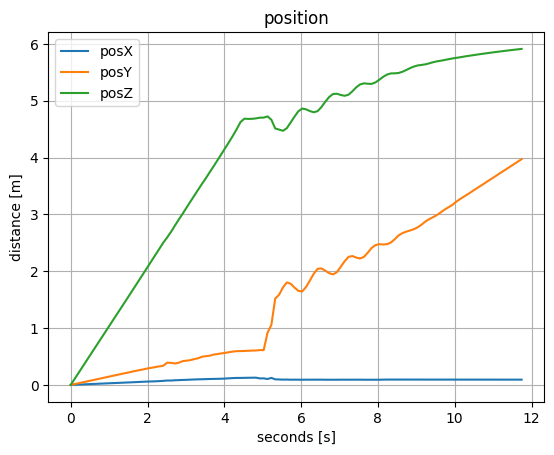

In [47]:
# def get_abs_position_from_abs_acceleration(
#     dataFrame:DataFrame,
#     positionColumnNameBase: str = "pos",
#     velocityColumnNameBase: str = "vel",
#     accelerationColumnNameBase: str = "accel",
#     axes: str | list[str] = ["X","Y","Z"],
#     dtName: str = "dt"
#     ) -> DataFrame:
    
#     dt = dataFrame[dtName].to_numpy()
#     for axe in axes:
#         a = dataFrame[accelerationColumnNameBase+axe].to_numpy()
#         dataFrame["d"+velocityColumnNameBase+axe] = a * dt
#         dataFrame["d"+positionColumnNameBase+axe] = 0.5 * a * dt*dt + a * dt
        
#         dataFrame[velocityColumnNameBase+axe] = dataFrame["d"+velocityColumnNameBase+axe].to_numpy().cumsum()
#         dataFrame[positionColumnNameBase+axe] = dataFrame["d"+positionColumnNameBase+axe].to_numpy().cumsum()
    
#     return dataFrame

# get_abs_position_from_abs_acceleration(dataFrame,accelerationColumnNameBase="absAccel")

pos = dataFrame[[f"pos{x}" for x in ["X","Y","Z"]]]
pos["t"] = dataFrame["t"]
pos.plot(x="t", grid=True, title="position", xlabel="seconds [s]", ylabel="distance [m]")